In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('training_sample.csv')
df.head()

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

We can see that all features contain integers. UseID is not necessary for our predictions so we can drop the column.

In [4]:
new_df = df.drop('UserID', axis=1)
new_df.head()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,0,1,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,1


In [10]:
mis_vals = []
cardinality = []
percent_missing = []
total = len(df)
modes1 = list()
modes2 = list()
freq1 = list()
freq2 = list()
mode1_p = list()
mode2_p = list()
for col in new_df.columns:
    missing = df[col].isnull().sum()
    mis_vals.append(missing)
    card = df[col].nunique()
    cardinality.append(card)
    percent_miss = round((missing/total)*100,2)
    percent_missing.append(percent_miss)
    mode1 = df[col].value_counts().index.tolist()[0]
    modes1.append(mode1)
    mode2 = df[col].value_counts().index.tolist()[1]
    modes2.append(mode2)
    mode1_freq = df[col].value_counts().tolist()[0]
    freq1.append(mode1_freq)
    mode2_freq = df[col].value_counts().tolist()[1]
    freq2.append(mode2_freq)
    mode1_perc = round((mode1_freq/total)*100,2)
    mode1_p.append(mode1_perc)
    mode2_perc = round((mode2_freq/total)*100,2)
    mode2_p.append(mode2_perc)
    print(f'{col}:\n\tPercent missing: {percent_miss}%'
          f'\n\tCardinality: {card}'
          f'\n\tMissing: {missing}'
          f'\n\tmode:{mode1}'
          f'\n\t2nd mode: {mode2}'
          f'\n\tfrequency: {mode1_freq}'
          f'\n\t2ndfrequency: {mode2_freq}'
          f'\n\tmode %: {mode1_perc}'
          f'\n\t2nd mode %: {mode2_perc}')
    

basket_icon_click:
	Percent missing: 0.0%
	Cardinality: 2
	Missing: 0
	mode:0
	2nd mode: 1
	frequency: 410248
	2ndfrequency: 45153
	mode %: 90.09
	2nd mode %: 9.91
basket_add_list:
	Percent missing: 0.0%
	Cardinality: 2
	Missing: 0
	mode:0
	2nd mode: 1
	frequency: 421464
	2ndfrequency: 33937
	mode %: 92.55
	2nd mode %: 7.45
basket_add_detail:
	Percent missing: 0.0%
	Cardinality: 2
	Missing: 0
	mode:0
	2nd mode: 1
	frequency: 403979
	2ndfrequency: 51422
	mode %: 88.71
	2nd mode %: 11.29
sort_by:
	Percent missing: 0.0%
	Cardinality: 2
	Missing: 0
	mode:0
	2nd mode: 1
	frequency: 438620
	2ndfrequency: 16781
	mode %: 96.32
	2nd mode %: 3.68
image_picker:
	Percent missing: 0.0%
	Cardinality: 2
	Missing: 0
	mode:0
	2nd mode: 1
	frequency: 443226
	2ndfrequency: 12175
	mode %: 97.33
	2nd mode %: 2.67
account_page_click:
	Percent missing: 0.0%
	Cardinality: 2
	Missing: 0
	mode:0
	2nd mode: 1
	frequency: 453775
	2ndfrequency: 1626
	mode %: 99.64
	2nd mode %: 0.36
promo_banner_click:
	Percent mis

In [39]:
columns = ['Feature', 'Count', '% of Missing', 'Cardinality', 'Mode', 'Mode Frequency', 'Mode %', '2nd Mode', '2nd Mode Frequency', '2nd Mode %']
features = new_df.columns

print("DATA QUALITY REPORT")

dqr = pd.read_csv('dqr.csv', names=columns)
for item in dqr:
    for i in range(len(features)):
        if item == 'Feature':
            dqr.loc[i:i,item] = features[i]
        elif item == 'Count':
            dqr.loc[i:i,item] = len(df[features[i]])
        elif item == '% of Missing':
            dqr.loc[i:i,item] = percent_missing[i]
        elif item == 'Cardinality':
            dqr.loc[i:i,item] = cardinality[i]
        elif item == 'Mode':
            dqr.loc[i:i,item] = modes1[i]
        elif item == 'Mode Frequency':
            dqr.loc[i:i,item] = freq1[i]
        elif item == 'Mode %':
            dqr.loc[i:i,item] = mode1_p[i]
        elif item == '2nd Mode':
            dqr.loc[i:i,item] = modes2[i]
        elif item == '2nd Mode Frequency':
            dqr.loc[i:i,item] = freq2[i]
        elif item == '2nd Mode %':
            dqr.loc[i:i,item] = mode2_p[i]
dqr

DATA QUALITY REPORT


,Feature,Count,% of Missing,Cardinality,Mode,Mode Frequency,Mode %,2nd Mode,2nd Mode Frequency,2nd Mode %
0,basket_icon_click,455401,0,2,0,410248,90.09,1,45153,9.91
1,basket_add_list,455401,0,2,0,421464,92.55,1,33937,7.45
2,basket_add_detail,455401,0,2,0,403979,88.71,1,51422,11.29
3,sort_by,455401,0,2,0,438620,96.32,1,16781,3.68
4,image_picker,455401,0,2,0,443226,97.33,1,12175,2.67
5,account_page_click,455401,0,2,0,453775,99.64,1,1626,0.36
6,promo_banner_click,455401,0,2,0,448020,98.38,1,7381,1.62
7,detail_wishlist_add,455401,0,2,0,453802,99.65,1,1599,0.35
8,list_size_dropdown,455401,0,2,0,350494,76.96,1,104907,23.04
9,closed_minibasket_click,455401,0,2,0,447533,98.27,1,7868,1.73


Every feature's cardinality is 2 so we know that the value is either 0 or 1, therefore no normalization is needed and no outliers are present.

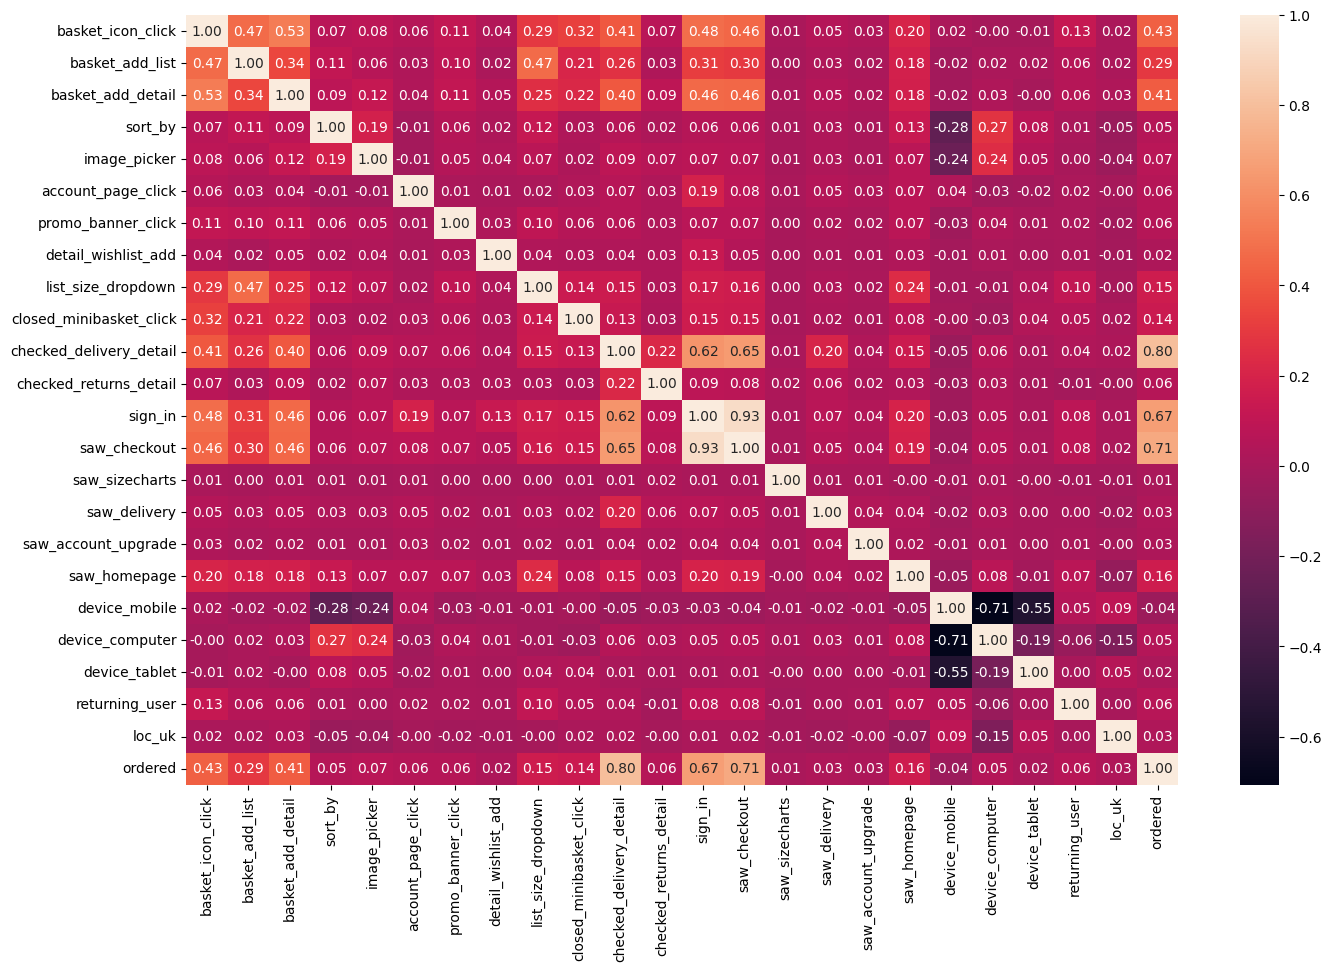

In [38]:
corr = new_df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=True,fmt='.2f')
plt.show()

The heatmap above shows us the correlation between the each feature. Majority of the correlations are closer to zero, so this shows us that most of the our data is independent. However we have a few features that are closely related to each other. 'device_mobile', 'device_tablet', and 'device_computer' are fairly negatively correlated, and 'checked_delivery_detail' and 'ordered', and 'sign_in' and 'saw_checkout', have a strong positive correlation.